In [1]:
#!/usr/bin/python3.7
##########    form yahoo open close giornaliero (non continuo) #######################
#######         plot trend in aumento su 3 anni e su 3 mesi            ###############



# Inserire un coefficiente di volatilità
# Inserire trend logaritmici ed esponenziali per valutare la crescita


from threading import Thread
import time
import pandas_datareader.data as web
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import time
from datetime import datetime
import matplotlib.pyplot as plt
#from iex import reference
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
plt.style.use('ggplot')
import sys
import os
import shutil
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import mammoth
#pip3.7 install --user python-docx
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_ALIGN_PARAGRAPH
import pickle
import h5py
import dateutil.relativedelta
import dateutil.relativedelta as datdelta


###  Import the external Class and functions
from yahoo_scan import Yahoo_Scan
from retrieve_symb import retrieve_symb_list
#

print('START!!!')

print(os.getcwd())
print(os.path.dirname(os.getcwd()))

START!!!
C:\Users\fpe\PycharmProjects\magicpy\Z-F-Y-S
C:\Users\fpe\PycharmProjects\magicpy


In [2]:
ist1 = Yahoo_Scan('PBF','01/01/2006','d',1)

In [3]:
ist1.df_all.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'datestamp',
       'timestamp', 'day_perf', 'day_perf_x100', 'Open_p', 'Close_p',
       'Open_p2', 'Close_p2', 'Open_p5', 'Close_p5', 'Open_p10', 'Close_p10',
       'Volume_p', 'ema12', 'ema26', 'macd', 'signal', 'histogram', 'DVolume',
       'ema12v', 'ema26v', 'macdv', 'signalv', 'histogramv', 'Overnight',
       'Dgain', 'Tgain_', 'Dgain_p', 'Dgain_p2', 'Dgain_p5', 'Dgain_p10',
       'MDgain_p1', 'MDgain_p2', 'MDgain_p5', 'MDgain_p10', 'histogram_p',
       'hist_trend', 'hist_peack', 'hist_trend_p', 'hist_changepoint',
       'maxday', 'daytype', 'deltaday', 'low_err', 'y_pred_l', 'high_err',
       'y_pred_h'],
      dtype='object')

In [4]:
ist1.df_all = ist1.df_all[ist1.df_all.index > ('01-03-2019')]

In [5]:
%matplotlib inline
import numpy as np 
from techindicators import * # This line imports all functions from techindicators.py
import matplotlib.pyplot as plt
from datetime import datetime
#from mpl_finance import candlestick2_ohlc
import mplfinance
# use the old mplfinance
from mplfinance.original_flavor import candlestick2_ohlc

In [6]:
ticker=ist1.stock
sd_open = np.array(ist1.df_all.iloc[:,2]) # Open
sd_high = np.array(ist1.df_all.iloc[:,0]) # High
sd_low = np.array(ist1.df_all.iloc[:,1]) # Low
sd_close = np.array(ist1.df_all.iloc[:,3]) # Close
sd_volume = np.array(ist1.df_all.iloc[:,4]) # Volume
sd_dates = np.array(ist1.df_all.index).astype('datetime64[D]') # ('example_data.csv', delimiter=',', usecols=(0), dtype='datetime64[D]') # Dates
tradedays = np.arange(len(sd_close)) # Array of number of trading days

In [7]:
sma50 = sma(sd_close,50) # calculate 50 day SMA of closing price
ema20 = ema(sd_close,20) # calculate 20 day EMA of closing price
wma50 = wma(sd_close,50) # calculated 50 day WMA of closing price
kama_sd = kama(sd_close,10,2,30) # calculate standard Kaufman adaptive moving average

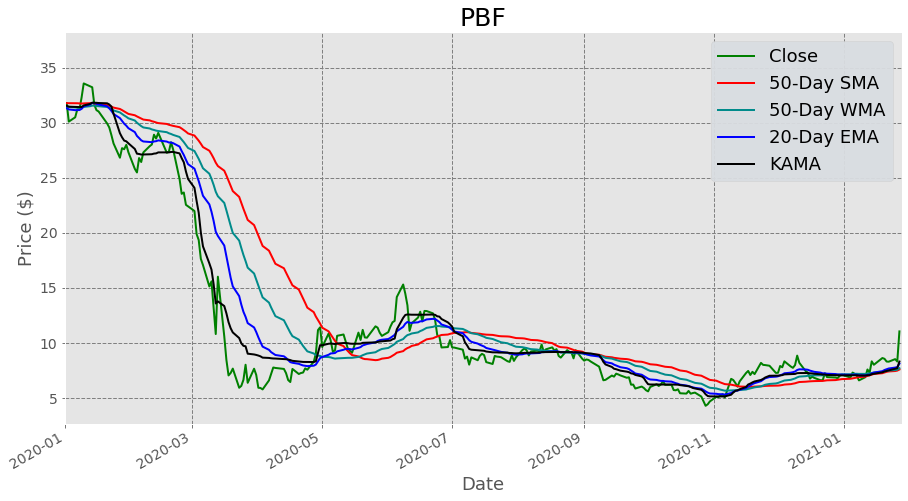

In [8]:
# plot daily closing price of SPY along with 50-day SMA, 20-day EMA, and KAMA
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(sd_dates.astype(datetime),sd_close,color='green',lw=2,label="Close")
ax.plot(sd_dates[len(sd_dates)-len(sma50):].astype(datetime),sma50,color='red',lw=2,label='50-Day SMA')
ax.plot(sd_dates[len(sd_dates)-len(wma50):].astype(datetime),wma50,color='darkcyan',lw=2,label='50-Day WMA')
ax.plot(sd_dates[len(sd_dates)-len(ema20):].astype(datetime),ema20,color='blue',lw=2,label='20-Day EMA')
ax.plot(sd_dates[len(sd_dates)-len(kama_sd):].astype(datetime),kama_sd,color='black',lw=2,label='KAMA')
ax.set_title(ticker,fontsize=25)
ax.set_xlabel('Date',fontsize=18)
ax.set_ylabel('Price ($)',fontsize=18)
ax.set_xlim([dt.date(2020, 1, 1), dt.date.today()])
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
fig.autofmt_xdate()
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [9]:
macd_line_sd = macd(sd_close,12,26,9)[0]
macd_signal_sd = macd(sd_close,12,26,9)[1]
macd_histogram_sd = macd_line_sd[len(macd_line_sd)-len(macd_signal_sd):]-macd_signal_sd

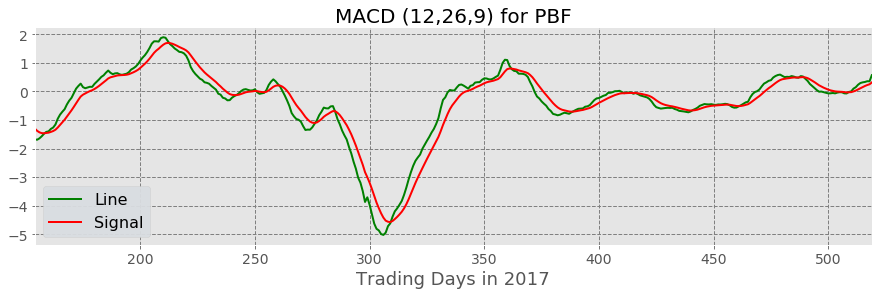

In [10]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(tradedays[len(tradedays)-len(macd_line_sd):],macd_line_sd,color='green',lw=2,label="Line")
ax.plot(tradedays[len(tradedays)-len(macd_signal_sd):],macd_signal_sd,color='red',lw=2,label="Signal")
ax.set_title('MACD (12,26,9) for %s' % ticker,fontsize=20)
ax.set_xlabel('Trading Days in 2017',fontsize=18)
ax.set_ylabel('',fontsize=18)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
ax.set_xlim([tradedays[len(tradedays)-len(macd_line_sd):].max()-365,tradedays[len(tradedays)-len(macd_line_sd):].max()])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

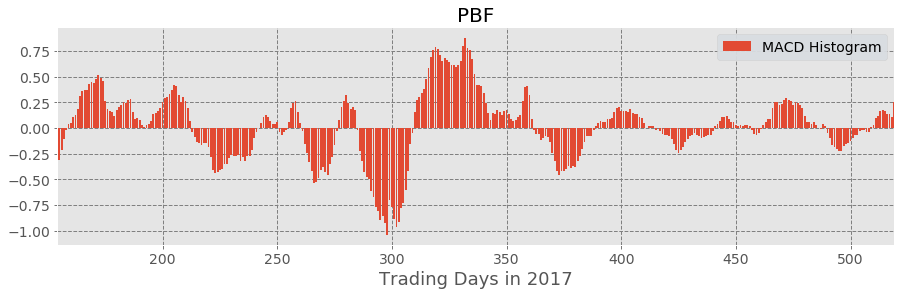

In [11]:
fig, ax = plt.subplots(figsize=(15,4))
ax.bar(tradedays[len(tradedays)-len(macd_histogram_sd):],macd_histogram_sd,label="MACD Histogram")
ax.set_title(ticker,fontsize=20)
ax.set_xlabel('Trading Days in 2017',fontsize=18)
ax.set_ylabel('',fontsize=18)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=14, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
ax.set_xlim([tradedays[len(tradedays)-len(macd_line_sd):].max()-365,tradedays[len(tradedays)-len(macd_line_sd):].max()])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [12]:
chand_long = chand(sd_high,sd_low,sd_close,22,3,'long')
chand_short = chand(sd_high,sd_low,sd_close,22,3,'short')

In [27]:
ist1.df_all.shape

(520, 53)

In [32]:
ist1.df_all['chand_short'] = 0
ist1.df_all['chand_short'][ist1.df_all.shape[0]-len(chand_short):] = chand_short

In [39]:
ist1.df_all['diff'] = ist1.df_all['chand_short'] - ist1.df_all['Open'] 

In [40]:
ist1.df_all['diff']

Date
2019-01-04   -33.180000
2019-01-07   -33.889999
2019-01-08   -34.459999
2019-01-09   -34.389999
2019-01-10   -34.349998
                ...    
2021-01-21    -0.467497
2021-01-22     0.101935
2021-01-25     0.016392
2021-01-26    -0.509353
2021-01-27     0.684255
Name: diff, Length: 520, dtype: float64

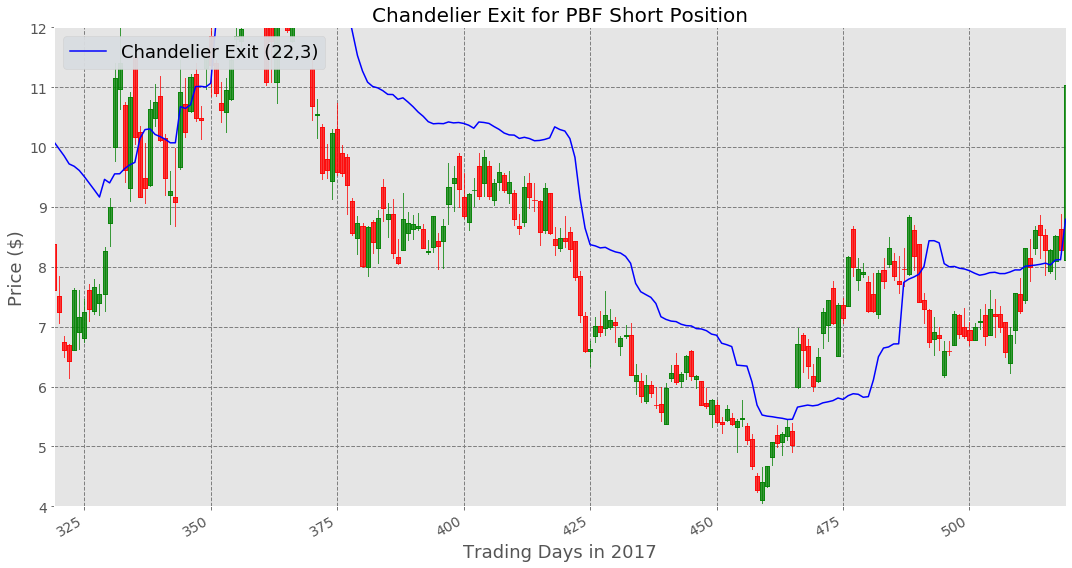

In [22]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_ylabel('Price ($)')
ax.set_xlabel('Date')
candlestick2_ohlc(ax,sd_open,sd_high,sd_low,sd_close,width=0.8,colorup='g',colordown='r',alpha=0.75)
ax.plot(tradedays[len(sd_dates)-len(chand_short):],chand_short,color='blue',lw=1.5,label='Chandelier Exit (22,3)')
ax.set_title('Chandelier Exit for %s Short Position' % ticker,fontsize=20)
ax.set_xlabel('Trading Days in 2017',fontsize=18)
ax.set_ylabel('Price ($)',fontsize=18)
ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.set_xlim([tradedays[len(sd_dates)-len(chand_short):].max()-200,tradedays[len(sd_dates)-len(chand_short):].max()])
ax.set_ylim([4,12])
fig.autofmt_xdate()
fig.tight_layout()
plt.show()